### Custom BERT implementation

In [1]:
%cd ../..
from inpainting.models import BERT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST
from inpainting.utils import configure_environment

configure_environment()

/home/ventus/image-inpainting


Seed set to 41633


Device set to cuda


In [2]:
mnist = MNIST(frac=0.01, clusters=35)
weights = 1/mnist.distribution

In [3]:
weights

array([1.46699267e+00, 9.60784314e+01, 1.26724138e+02, 1.04255319e+02,
       1.12643678e+02, 1.14843750e+02, 1.12643678e+02, 1.26724138e+02,
       1.88461538e+02, 1.16666667e+02, 4.65189873e+01, 1.20987654e+02,
       1.83750000e+02, 1.07299270e+02, 1.38028169e+02, 1.36111111e+02,
       1.53926702e+02, 8.54651163e+01, 1.82608696e+02, 7.31343284e+01,
       1.19028340e+02, 1.02439024e+02, 1.04626335e+02, 1.42028986e+02,
       7.90322581e+01, 1.36744186e+02, 1.04626335e+02, 1.14843750e+02,
       9.01840491e+01, 5.60000000e+01, 8.05479452e+01, 1.28947368e+02,
       1.46268657e+02, 1.40000000e+02, 1.03521127e+02, 2.94000000e+04])

In [4]:
model = BERT(
    vocab_size = mnist.tokens,      # BERT's vocabulary size
    embed_size = mnist.tokens,      # Hidden size
    num_layers = 12,                # Number of Transformer layers
    num_heads = 12,                 # Numbertargets of attention heads
    ff_hidden = 6400,               # Feed-forward hidden size
    max_len = 7*7,                  # Maximum sequence length
    dropout = 0.00,
	ce_weights=weights
)

In [5]:
Trainer(model, mnist).train(epochs=50, batch_size=64, lr=2e-5)

running on device cuda
Epoch: 0.00	RMSE: 94.77	Loss: 2.91e+00	Learning Rate: 1.96e-05
Epoch: 1.00	RMSE: 48.03	Loss: 1.96e+00	Learning Rate: 1.91e-05
Epoch: 2.00	RMSE: 36.36	Loss: 1.49e+00	Learning Rate: 1.87e-05
Epoch: 3.00	RMSE: 23.74	Loss: 1.16e+00	Learning Rate: 1.83e-05
Epoch: 4.00	RMSE: 23.90	Loss: 9.96e-01	Learning Rate: 1.79e-05
Epoch: 5.00	RMSE: 23.22	Loss: 8.26e-01	Learning Rate: 1.74e-05
Epoch: 6.00	RMSE: 22.62	Loss: 6.99e-01	Learning Rate: 1.70e-05
Epoch: 7.00	RMSE: 23.38	Loss: 7.07e-01	Learning Rate: 1.66e-05
Epoch: 8.00	RMSE: 23.04	Loss: 6.10e-01	Learning Rate: 1.62e-05
Epoch: 9.00	RMSE: 21.25	Loss: 5.91e-01	Learning Rate: 1.57e-05
Epoch: 10.00	RMSE: 22.95	Loss: 5.65e-01	Learning Rate: 1.53e-05
Epoch: 11.00	RMSE: 21.86	Loss: 5.15e-01	Learning Rate: 1.49e-05
Epoch: 12.00	RMSE: 22.43	Loss: 5.14e-01	Learning Rate: 1.44e-05
Epoch: 13.00	RMSE: 21.75	Loss: 4.63e-01	Learning Rate: 1.40e-05
Epoch: 14.00	RMSE: 22.29	Loss: 5.06e-01	Learning Rate: 1.36e-05
Epoch: 15.00	RMSE: 20.61	Lo

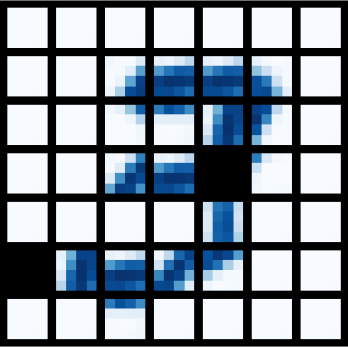

In [6]:
x = mnist[7]["input_ids"]
mnist.plot_sample(x)

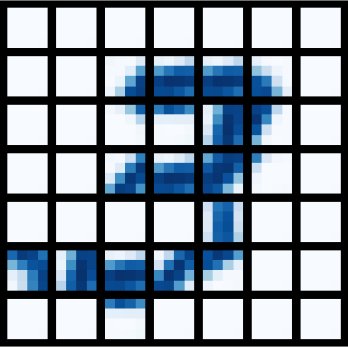

In [7]:
y = model(x.unsqueeze(0).cuda()).logits.argmax(dim=-1).cpu()
mnist.plot_sample(y)